In [1]:
# from google.colab import drive
# drive.mount('/content/drive')

# Redes Neurais: Séries Temporais

Autor:
- Larissa Ionafa RA:1903166
- Roberta Yumi Romero Takahashi RA:1903220

## Lendo as bibliotecas

In [2]:
import tensorflow as tf
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score,mean_squared_error
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

In [3]:
train = pd.read_csv('./acoes_train.csv',index_col='Date')
train.tail()

,index,Open,High,Low,Close,Volume,Close_1lag,Close_2lag,Close_3lag,Close_4lag,Close_5lag
Date,,,,,,,,,,,
1/4/2021 16:00:00,1450,222.53,223.00,214.81,217.69,37130139,222.42,221.68,224.15,224.96,222.75
1/5/2021 16:00:00,1451,217.26,218.52,215.70,217.90,23822953,217.69,222.42,221.68,224.15,224.96
1/6/2021 16:00:00,1452,212.17,216.49,211.94,212.25,35930653,217.90,217.69,222.42,221.68,224.15
1/7/2021 16:00:00,1453,214.04,219.34,213.71,218.29,27694480,212.25,217.90,217.69,222.42,221.68
1/8/2021 16:00:00,1454,218.68,220.58,217.03,219.62,22956206,218.29,212.25,217.90,217.69,222.42


In [4]:
train.index = pd.to_datetime(train.index)

In [5]:
test = pd.read_csv('./acoes_test.csv',index_col='Date')
test.index = pd.to_datetime(test.index)
test.tail()

,index,Open,High,Low,Close,Volume,Close_1lag,Close_2lag,Close_3lag,Close_4lag,Close_5lag
Date,,,,,,,,,,,
2021-03-25 16:00:00,1506,235.30,236.94,231.57,232.34,34061853,235.46,237.58,235.99,230.35,230.72
2021-03-26 16:00:00,1507,231.55,236.71,231.55,236.48,25479853,232.34,235.46,237.58,235.99,230.35
2021-03-29 16:00:00,1508,236.59,236.80,231.88,235.24,25227455,236.48,232.34,235.46,237.58,235.99
2021-03-30 16:00:00,1509,233.53,233.85,231.10,231.85,24792012,235.24,236.48,232.34,235.46,237.58
2021-03-31 16:00:00,1510,232.91,239.10,232.39,235.77,43623471,231.85,235.24,236.48,232.34,235.46


In [6]:
time_series_full = pd.concat([train,test])
time_series_full

,index,Open,High,Low,Close,Volume,Close_1lag,Close_2lag,Close_3lag,Close_4lag,Close_5lag
Date,,,,,,,,,,,
2015-04-09 16:00:00,5,41.25,41.62,41.25,41.48,25723861,41.42,41.53,41.55,40.29,40.72
2015-04-10 16:00:00,6,41.63,41.95,41.41,41.72,28022002,41.48,41.42,41.53,41.55,40.29
2015-04-13 16:00:00,7,41.40,42.06,41.39,41.76,30276692,41.72,41.48,41.42,41.53,41.55
2015-04-14 16:00:00,8,41.80,42.03,41.39,41.65,24244382,41.76,41.72,41.48,41.42,41.53
2015-04-15 16:00:00,9,41.76,42.46,41.68,42.26,27343581,41.65,41.76,41.72,41.48,41.42
...,...,...,...,...,...,...,...,...,...,...,...
2021-03-25 16:00:00,1506,235.30,236.94,231.57,232.34,34061853,235.46,237.58,235.99,230.35,230.72
2021-03-26 16:00:00,1507,231.55,236.71,231.55,236.48,25479853,232.34,235.46,237.58,235.99,230.35
2021-03-29 16:00:00,1508,236.59,236.80,231.88,235.24,25227455,236.48,232.34,235.46,237.58,235.99


# Criando Defasagens (lags)

In [7]:
time_series_full['Close_1lag'] = [0]+list(time_series_full['Close'].values)[:-1]
time_series_full['Close_2lag'] = [0,0]+list(time_series_full['Close'].values)[:-2]
time_series_full['Close_3lag'] = [0,0,0]+list(time_series_full['Close'].values)[:-3]
time_series_full['Close_4lag'] = [0,0,0,0]+list(time_series_full['Close'].values)[:-4]
time_series_full['Close_5lag'] = [0,0,0,0,0]+list(time_series_full['Close'].values)[:-5]

In [8]:
time_series_full.head(7)

,index,Open,High,Low,Close,Volume,Close_1lag,Close_2lag,Close_3lag,Close_4lag,Close_5lag
Date,,,,,,,,,,,
2015-04-09 16:00:00,5,41.25,41.62,41.25,41.48,25723861,0.00,0.00,0.00,0.00,0.00
2015-04-10 16:00:00,6,41.63,41.95,41.41,41.72,28022002,41.48,0.00,0.00,0.00,0.00
2015-04-13 16:00:00,7,41.40,42.06,41.39,41.76,30276692,41.72,41.48,0.00,0.00,0.00
2015-04-14 16:00:00,8,41.80,42.03,41.39,41.65,24244382,41.76,41.72,41.48,0.00,0.00
2015-04-15 16:00:00,9,41.76,42.46,41.68,42.26,27343581,41.65,41.76,41.72,41.48,0.00
2015-04-16 16:00:00,10,41.95,42.34,41.82,42.16,22509652,42.26,41.65,41.76,41.72,41.48
2015-04-17 16:00:00,11,41.67,41.74,41.16,41.62,42387608,42.16,42.26,41.65,41.76,41.72


In [9]:
print(len(time_series_full))
time_series_full = time_series_full.loc[(time_series_full.Close_5lag > 0)]
print(len(time_series_full))

1506
1501


In [10]:
len(train.index)

1450

In [11]:
train = time_series_full.loc[(time_series_full.index.isin(train.index))]
train.tail()

,index,Open,High,Low,Close,Volume,Close_1lag,Close_2lag,Close_3lag,Close_4lag,Close_5lag
Date,,,,,,,,,,,
2021-01-04 16:00:00,1450,222.53,223.00,214.81,217.69,37130139,222.42,221.68,224.15,224.96,222.75
2021-01-05 16:00:00,1451,217.26,218.52,215.70,217.90,23822953,217.69,222.42,221.68,224.15,224.96
2021-01-06 16:00:00,1452,212.17,216.49,211.94,212.25,35930653,217.90,217.69,222.42,221.68,224.15
2021-01-07 16:00:00,1453,214.04,219.34,213.71,218.29,27694480,212.25,217.90,217.69,222.42,221.68
2021-01-08 16:00:00,1454,218.68,220.58,217.03,219.62,22956206,218.29,212.25,217.90,217.69,222.42


In [12]:
test = time_series_full.loc[(time_series_full.index.isin(test.index))]
test.tail()

,index,Open,High,Low,Close,Volume,Close_1lag,Close_2lag,Close_3lag,Close_4lag,Close_5lag
Date,,,,,,,,,,,
2021-03-25 16:00:00,1506,235.30,236.94,231.57,232.34,34061853,235.46,237.58,235.99,230.35,230.72
2021-03-26 16:00:00,1507,231.55,236.71,231.55,236.48,25479853,232.34,235.46,237.58,235.99,230.35
2021-03-29 16:00:00,1508,236.59,236.80,231.88,235.24,25227455,236.48,232.34,235.46,237.58,235.99
2021-03-30 16:00:00,1509,233.53,233.85,231.10,231.85,24792012,235.24,236.48,232.34,235.46,237.58
2021-03-31 16:00:00,1510,232.91,239.10,232.39,235.77,43623471,231.85,235.24,236.48,232.34,235.46


# Modelagem de Séries Temporais

### Rede Neural LSTM

In [13]:
# Passo 1: separando X e Y e normalizando os dados

X = train[['Close_1lag',	'Close_2lag',	'Close_3lag',	'Close_4lag',	'Close_5lag']]
y = train["Close"]

# Normalização dos dados
# Normalize os dados (opcional, mas pode melhorar o desempenho da rede)
scaler_X = MinMaxScaler()
scaler_y = MinMaxScaler()
X_scaled = scaler_X.fit_transform(X)
y_scaled = scaler_y.fit_transform(y.values.reshape(-1, 1))

# Converta os dados para o formato 3D esperado pela LSTM (samples, timesteps, features)
# Nesse caso, como temos apenas uma variável explicativa (3 features), definimos timesteps = 1.
X_lstm = X_scaled.reshape(X_scaled.shape[0], 1, X_scaled.shape[1])

In [14]:
len(X),len(y)

(1445, 1445)

In [15]:
X_lstm.shape #1462 linhas na base, por 1 data, com 3 variáveis explicativas em cada data

(1445, 1, 5)

### LSTM: Modelo 1

In [16]:
# Passo 2: Crie o modelo LSTM usando TensorFlow

model1 = Sequential()
model1.add(LSTM(units=50, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model1.add(Dense(units=1))

# Passo 3: Compile o modelo

model1.compile(loss='mean_squared_error', optimizer='adam')

# Passo 4: Treine o modelo

history1 = model1.fit(X_lstm, y_scaled, epochs=200, batch_size=32)

Epoch 1/200


46/46 [==============================] - 2s 1ms/step - loss: 0.1015
Epoch 2/200
46/46 [==============================] - 0s 1ms/step - loss: 0.0087
Epoch 3/200
46/46 [==============================] - 0s 1ms/step - loss: 0.0021
Epoch 4/200
46/46 [==============================] - 0s 956us/step - loss: 7.4074e-04
Epoch 5/200
46/46 [==============================] - 0s 1ms/step - loss: 4.0549e-04
Epoch 6/200
46/46 [==============================] - 0s 1ms/step - loss: 3.2983e-04
Epoch 7/200
46/46 [==============================] - 0s 1ms/step - loss: 3.0842e-04
Epoch 8/200
46/46 [==============================] - 0s 978us/step - loss: 2.9665e-04
Epoch 9/200
46/46 [==============================] - 0s 956us/step - loss: 2.9044e-04
Epoch 10/200
46/46 [==============================] - 0s 978us/step - loss: 2.8148e-04
Epoch 11/200
46/46 [==============================] - 0s 956us/step - loss: 2.8124e-04
Epoch 12/200
46/46 [==============================] - 0s 956us/step - loss: 2.7217e-04
E

### LSTM: Modelo 2

In [17]:
# Passo 2: Crie o modelo LSTM usando TensorFlow

model2 = Sequential()
model2.add(LSTM(units=100, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model2.add(Dense(units=1))

# Passo 3: Compile o modelo

model2.compile(loss='mean_squared_error', optimizer='adam')

# Passo 4: Treine o modelo

history2 = model2.fit(X_lstm, y_scaled, epochs=200, batch_size=32)

Epoch 1/200
46/46 [==============================] - 1s 1ms/step - loss: 0.1134
Epoch 2/200
46/46 [==============================] - 0s 1ms/step - loss: 0.0145
Epoch 3/200
46/46 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 4/200
46/46 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 5/200
46/46 [==============================] - 0s 2ms/step - loss: 6.1315e-04
Epoch 6/200
46/46 [==============================] - 0s 1ms/step - loss: 4.2810e-04
Epoch 7/200
46/46 [==============================] - 0s 1ms/step - loss: 3.6297e-04
Epoch 8/200
46/46 [==============================] - 0s 1ms/step - loss: 3.3313e-04
Epoch 9/200
46/46 [==============================] - 0s 1ms/step - loss: 3.1453e-04
Epoch 10/200
46/46 [==============================] - 0s 1ms/step - loss: 3.0458e-04
Epoch 11/200
46/46 [==============================] - 0s 1ms/step - loss: 2.9635e-04
Epoch 12/200
46/46 [==============================] - 0s 1ms/step - loss: 2.8894e-04
Epoch

### LSTM: Modelo 3

In [18]:
# Passo 2: Crie o modelo LSTM usando TensorFlow

model3 = Sequential()
model3.add(LSTM(units=100, activation='relu', input_shape=(X_lstm.shape[1], X_lstm.shape[2])))
model3.add(Dense(units=1))

# Passo 3: Compile o modelo

model3.compile(loss='mean_squared_error', optimizer='adam')

# Passo 4: Treine o modelo

history3 = model3.fit(X_lstm, y_scaled, epochs=200, batch_size=128)

Epoch 1/200
12/12 [==============================] - 1s 2ms/step - loss: 0.1563
Epoch 2/200
12/12 [==============================] - 0s 2ms/step - loss: 0.1090
Epoch 3/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0644
Epoch 4/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0286
Epoch 5/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0098
Epoch 6/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0059
Epoch 7/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0050
Epoch 8/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0038
Epoch 9/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0029
Epoch 10/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0022
Epoch 11/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0017
Epoch 12/200
12/12 [==============================] - 0s 2ms/step - loss: 0.0013
Epoch 13/200
12/12 [=================

### Comparando a Loss

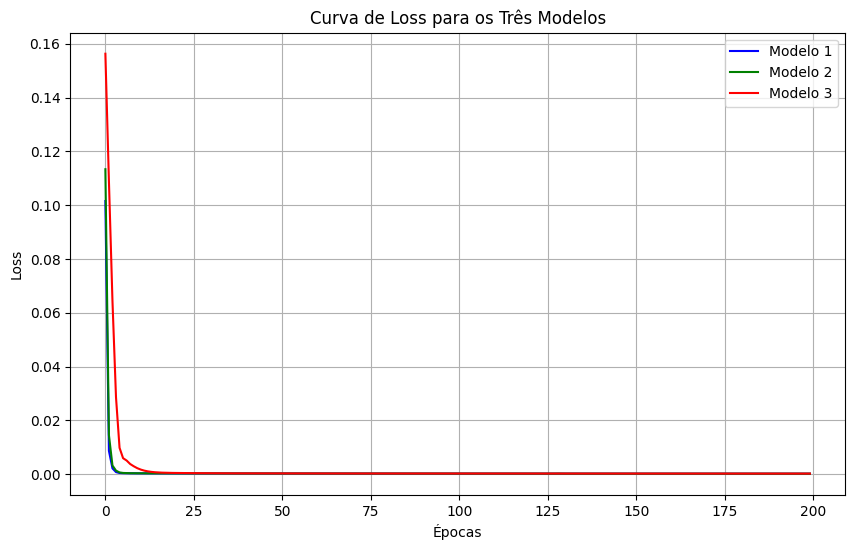

In [19]:
# Supondo que você tenha os objetos "history1", "history2" e "history3", que contêm informações sobre o treinamento dos três modelos.

# Plotando as curvas de loss
plt.figure(figsize=(10, 6))

plt.plot(history1.history['loss'], label='Modelo 1', color='blue')
plt.plot(history2.history['loss'], label='Modelo 2', color='green')
plt.plot(history3.history['loss'], label='Modelo 3', color='red')

plt.xlabel('Épocas')
plt.ylabel('Loss')
plt.title('Curva de Loss para os Três Modelos')
plt.legend()
plt.grid(True)
plt.show()

### Avaliando a base de teste

In [20]:
# Passo 1: Pré-processamento dos novos dados de teste

# Divida os dados em variáveis de entrada (X) e variável de saída (y), similar ao que você fez para os dados de treinamento.
X_test = test[['Close_1lag',	'Close_2lag',	'Close_3lag',	'Close_4lag',	'Close_5lag']]

# Normalize os dados usando o mesmo scaler que você usou para os dados de treinamento.
X_test_scaled = scaler_X.transform(X_test)

# Converta os dados para o formato 3D esperado pela LSTM
X_test_lstm = X_test_scaled.reshape(X_test_scaled.shape[0], 1, X_test_scaled.shape[1])

# Passo 2: Fazer previsões com o modelo LSTM

# Use o método predict para fazer as previsões
y_pred_scaled1 = model1.predict(X_test_lstm)
y_pred_scaled2 = model2.predict(X_test_lstm)
y_pred_scaled3 = model3.predict(X_test_lstm)

# Como o modelo retorna as previsões em escala, desfaça a normalização para obter as previsões reais
y_pred1 = scaler_y.inverse_transform(y_pred_scaled1)
y_pred2 = scaler_y.inverse_transform(y_pred_scaled2)
y_pred3 = scaler_y.inverse_transform(y_pred_scaled3)

2/2 [==============================] - 0s 3ms/step


In [21]:
# Calcule o RMSE para cada modelo
rmse_model1 = np.sqrt(np.mean((np.array(test['Close']) - y_pred1) ** 2))
rmse_model2 = np.sqrt(np.mean((np.array(test['Close']) - y_pred2) ** 2))
rmse_model3 = np.sqrt(np.mean((np.array(test['Close']) - y_pred3) ** 2))

print('RMSE Modelo 1:', rmse_model1)
print('RMSE Modelo 2:', rmse_model2)
print('RMSE Modelo 3:', rmse_model3)

RMSE Modelo 1: 11.095960069998354
RMSE Modelo 2: 11.35977502569674
RMSE Modelo 3: 11.900779864567335


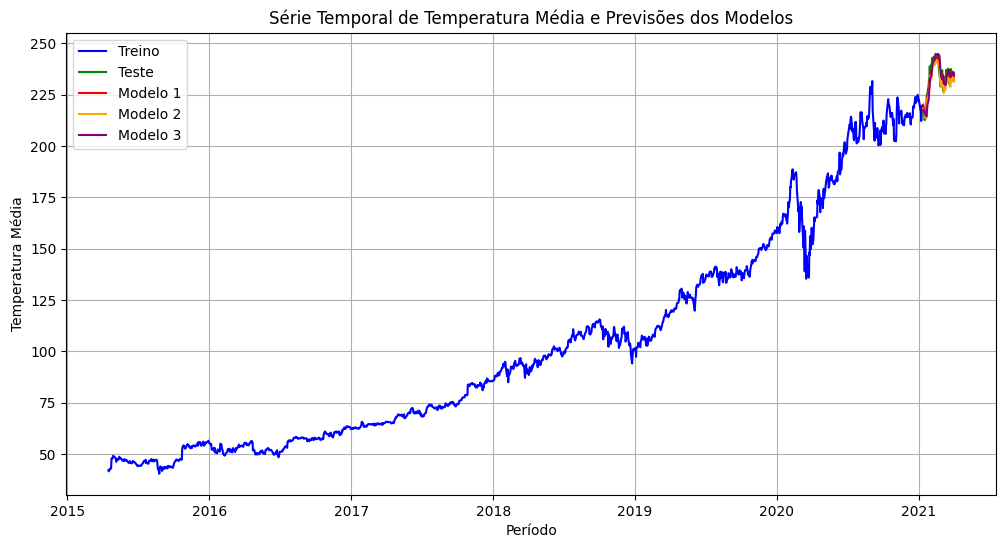

In [22]:
# Plotando a série temporal da coluna "Close" da base de treino e teste
plt.figure(figsize=(12, 6))
plt.plot(train.index, train['Close'], label='Treino', color='blue')
plt.plot(test.index, test['Close'], label='Teste', color='green')

# Plotando as previsões dos modelos em cores diferentes
plt.plot(test.index, y_pred1, label='Modelo 1', color='red')
plt.plot(test.index, y_pred2, label='Modelo 2', color='orange')
plt.plot(test.index, y_pred3, label='Modelo 3', color='purple')

plt.xlabel('Período')
plt.ylabel('Temperatura Média')
plt.title('Série Temporal de Temperatura Média e Previsões dos Modelos')
plt.legend(loc='upper left')
plt.grid(True)
plt.show()

In [23]:
test['Modelo 1'] = y_pred1
test['Modelo 2'] = y_pred2
test['Modelo 3'] = y_pred3

test

C:\Users\ionaf\AppData\Local\Temp\ipykernel_47324\936593515.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Modelo 1'] = y_pred1
C:\Users\ionaf\AppData\Local\Temp\ipykernel_47324\936593515.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test['Modelo 2'] = y_pred2
C:\Users\ionaf\AppData\Local\Temp\ipykernel_47324\936593515.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in 

,index,Open,High,Low,Close,Volume,Close_1lag,Close_2lag,Close_3lag,Close_4lag,Close_5lag,Modelo 1,Modelo 2,Modelo 3
Date,,,,,,,,,,,,,,
2021-01-11 16:00:00,1455,218.47,218.91,216.73,217.49,23047029,219.62,218.29,212.25,217.90,217.69,220.198151,218.177383,217.495605
2021-01-12 16:00:00,1456,216.50,217.10,213.32,214.93,23249336,217.49,219.62,218.29,212.25,217.90,219.594315,218.087112,217.778122
2021-01-13 16:00:00,1457,214.02,216.76,213.93,216.34,20087080,214.93,217.49,219.62,218.29,212.25,217.968414,215.892899,216.453995
2021-01-14 16:00:00,1458,215.91,217.46,212.74,213.02,29346737,216.34,214.93,217.49,219.62,218.29,217.933136,215.702347,216.849411
2021-01-15 16:00:00,1459,213.52,214.51,212.03,212.65,31746512,213.02,216.34,214.93,217.49,219.62,216.468338,214.314560,215.831818
2021-01-19 16:00:00,1460,213.75,216.98,212.63,216.44,30480859,212.65,213.02,216.34,214.93,217.49,215.288864,213.239914,214.444427
2021-01-20 16:00:00,1461,217.70,225.79,217.29,224.34,37777260,216.44,212.65,213.02,216.34,214.93,216.938797,214.802139,214.559174
2021-01-21 16:00:00,1462,224.70,226.30,222.42,224.97,30749553,224.34,216.44,212.65,213.02,216.34,221.860138,220.272766,217.644562
2021-01-22 16:00:00,1463,227.08,230.07,225.80,225.95,30172663,224.97,224.34,216.44,212.65,213.02,224.630859,223.370544,220.158783


### AutoSarima

In [24]:
%pip install pmdarima


[notice] A new release of pip available: 22.3.1 -> 23.3.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [25]:
import pmdarima as pm

In [26]:
# Crie o modelo AutoARIMA e encontre o melhor modelo ARIMA automaticamente
model4 = pm.auto_arima(np.array(train['Close']), exogenous=np.array(train[['Close_1lag',	'Close_2lag',	'Close_3lag',	'Close_4lag',	'Close_5lag']]), seasonal=True, m=7)  # O parâmetro "m" representa a frequência da sazonalidade (7 dias por semana)

# Faça as previsões usando o modelo treinado
y_pred4 = model4.predict(n_periods=len(np.array(test['Close'])), exogenous=np.array(test[['Close_1lag',	'Close_2lag',	'Close_3lag',	'Close_4lag',	'Close_5lag']]))

In [27]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                      
===========================================================================================
Dep. Variable:                                   y   No. Observations:                 1445
Model:             SARIMAX(3, 1, 2)x(1, 0, [1], 7)   Log Likelihood               -3160.546
Date:                             Mon, 30 Oct 2023   AIC                           6339.091
Time:                                     01:42:10   BIC                           6386.568
Sample:                                          0   HQIC                          6356.812
                                            - 1445                                         
Covariance Type:                               opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0278      0.029      0.953      0.341      -0.029       0.085
ar.L1         -2.0486      0.022    -91.523      0.000      -2.092      -2.005
ar.L2         -1.3436      0.033    -41.327      0.000      -1.407      -1.280
ar.L3         -0.2051      0.014    -14.603      0.000      -0.233      -0.178
ma.L1          1.8181      0.019     98.237      0.000       1.782       1.854
ma.L2          0.9127      0.018     51.479      0.000       0.878       0.947
ar.S.L7        0.9516      0.040     23.664      0.000       0.873       1.030
ma.S.L7       -0.9317      0.048    -19.300      0.000      -1.026      -0.837
sigma2         4.6609      0.072     64.633      0.000       4.520       4.802
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):              9154.61
Prob(Q):                              0.91   Prob(JB):                         0.00
Heteroskedasticity (H):              17.59   Skew:                            -0.68
Prob(H) (two-sided):                  0.00   Kurtosis:                        15.26
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [28]:
# Calcule o RMSE para avaliar o desempenho do modelo
rmse = mean_squared_error(np.array(test['Close']), y_pred4, squared=False)
print(f"RMSE do AutoARIMA: {rmse}")

RMSE do AutoARIMA: 12.766676277700459


In [29]:
y_preds = [y_pred1, y_pred2, y_pred3]

In [30]:
rmse_values = [np.sqrt(mean_squared_error(test['Close'], y_pred)) for y_pred in y_preds]
best_model_index = np.argmin(rmse_values)

In [31]:
best_predictions = y_preds[best_model_index]
predictions_df = pd.DataFrame({
    'index': test.index,
    'predictions': best_predictions.ravel()
})
predictions_df.to_csv('./Result/LARISSA_IONAFA_ROBERTA_TAKAHASHI.csv', index=False)


# Conclusão

Os resultados com defasagens para explicar seu comportamento, obtivemos:

* RMSE Modelo 1: 11.095960069998354
* RMSE Modelo 2: 11.35977502569674
* RMSE Modelo 3: 11.900779864567335
* RMSE do AutoARIMA: 12.766676277700459

Portanto, **nesse estudo de caso**, a defasagem contribuiu para que a predição fosse mais precisa com o "Modelo 1", que apresentou o menor RMSE entre todos os modelos avaliados. Esse resultado indica a importância de considerar defasagens ao modelar séries temporais, pois elas podem ajudar a capturar padrões e estruturas temporais que são cruciais para fazer previsões precisas.